## FACE DETECTION ON IMAGE

<class 'numpy.ndarray'>
[[218 204 169 169]]


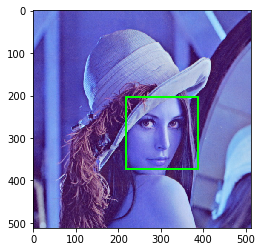

In [12]:
# importing libraries
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# creating face cascade object 
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# reading image using imread
img_lena=cv2.imread('lena.jpg')

# converting image from BGR to GRAY
img_gray_converted=cv2.cvtColor(img_lena,cv2.COLOR_BGR2GRAY)

# detecting face on the provided image
face_detect=face_cascade.detectMultiScale(img_gray_converted,scaleFactor=1.05,minNeighbors=5)

print(type(face_detect))
print(face_detect)

# drawing rectangle to show detected face
for x,y,w,h in face_detect:
    img_lena=cv2.rectangle(img_lena,(x,y),(x+w,y+h),(0,255,0),3)
#cv2.imshow("gray",img)
plt.imshow(img_lena)
plt.show()#RGB

## FACE DETECTION USING WEB CAM

In [2]:
# importing libraries 
import cv2
import numpy as np

# creating Cascade object for face detection
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# creating Cascade object for eye
eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')

# Capturing image from web cam
capture_img=cv2.VideoCapture(0)

while True:
    ret,image_detect=capture_img.read()
    # converting image to gray scale image
    img_gray_converted=cv2.cvtColor(image_detect,cv2.COLOR_BGR2GRAY)
    # detecting face on the image converted to gray
    face_detect=face_cascade.detectMultiScale(img_gray_converted,scaleFactor=1.3,minNeighbors=5)
    # creating boundary region on detected face
    for (x,y,w,h) in face_detect:
        cv2.rectangle(image_detect,(x,y),(x+w,y+h),(0,255,0),3)
        roi_image_gray=img_gray_converted[y:y+h,x:x+w]
        roi_color=image_detect[y:y+h,x:x+w]
        eye_detect=eye_cascade.detectMultiScale(roi_image_gray)
        for (e_x,e_y,e_w,e_h) in eye_detect:
            cv2.rectangle(roi_color,(e_x,e_y),(e_x+e_w,e_y+e_h),(255,0,0),2)
    cv2.imshow('img',image_detect)
    k=cv2.waitKey(13)
    if k==13:
        break
# Releasing the web cam and destroying all windows
capture_img.release()
cv2.destroyAllWindows()